# Higher Diploma in Science in Computing (Data Analytics)  

**University**: [Atlantic Technological University (ATU)](https://www.atu.ie/)  
**Module:** Computer Infrastructure  
**Lecturer:** [Ian McLoughlin](https://github.com/ianmcloughlin)  
**Author:** [Elaine R. Cazetta](https://github.com/elainecazetta)  

---

# Project: FAANG Stock Data Analysis with yfinance  
This notebook demonstrates how to download, store, and visualize [FAANG](https://www.investopedia.com/terms/f/faang-stocks.asp) stock data using Python and the yfinance package. It also shows how to structure a reusable function and automate plotting for further analysis.

---

## 🔹Problem 1 – Data from yfinance

---

### - Requirements:

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

---

### - Overview of the Solution:  

The following steps show how to import the necessary libraries, download hourly FAANG stock data for the past five days using the yfinance package, and save it to a timestamped CSV file inside the `data` folder.

In [1]:
# Import libraries

# Data Frames
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt

# Files and folders
import os

In [2]:
# List of FAANG tickers
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

In [3]:
# Download FAANG stocks data and assign it to a dataframe:
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
df.head(3) # show the first 3 rows

/tmp/ipykernel_4155/1249406616.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-05 14:30:00+00:00  104.665001  281.140015  231.169998  323.829987   
2025-12-05 15:30:00+00:00  100.519997  280.980011  231.240005  322.750000   
2025-12-05 16:30:00+00:00   99.949997  279.329987  229.815002  322.989990   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-12-05 14:30:00+00:00  673.500000  104.730003  ...  280.540009   
2025-12-05 15:30:00+00:00  673.000000  104.790001  ...  280.459991   
2025-12-05 16:30:00+00:00  674.679993  100.720001  ...  279.299988   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-12-05 14:30:00+00:00  230.380005  320.000000  664.500000   98.690002   
2025-12-05 15:30:00+00:00  230.940002  322.489990  670.984985  104.660004   
2025-12-05 16:30:00+00:00  229.649994  320.859985  668.650024  100.500000   

Price                       Volume                                       
Ticker                        AAPL     AMZN     GOOG     META      NFLX  
Datetime                                                                 
2025-12-05 14:30:00+00:00  4393145  4965629  3363481  3614338  29574869  
2025-12-05 15:30:00+00:00  3579247  2554794  1594421  1284282  14309801  
2025-12-05 16:30:00+00:00  2319755  1806782  1103657  2046790  11059580  

[3 rows x 25 columns]

### - The `Data` Directory:  
This step uses Python’s built-in `os` module to create a folder named `data`. This directory will store the CSV files downloaded from Yahoo Finance. The `os.makedirs()` function is used with the `exist_ok=True` argument to ensure the folder is created if it doesn’t already exist, avoiding any errors if it’s run multiple times.

In [4]:
# Import the os module and create 'data' folder if it doesn't exist
# Reference: https://docs.python.org/3/library/os.html
# Reference: OpenAI
import os

os.makedirs("data", exist_ok=True)

### - Dates and Times:   
To create unique filenames, a timestamp is generated using Python’s `datetime` module [(reference: official documentation)](https://docs.python.org/3/library/datetime.html). This guarantees that each dataset is saved with a distinctive and descriptive name.

In [5]:
# Get the current date and time using the datetime module
now = dt.datetime.now()

# Display the current date and time
now

datetime.datetime(2025, 12, 11, 21, 22, 35, 462477)

In [6]:
# Format the current date and time as a string: YYYYMMDD-HHmmss
# This format will be used in the filename
now.strftime("%Y%m%d-%H%M%S")

'20251211-212235'

In [7]:
# Create a unique filename that includes the timestamp
# The file will be saved inside the 'data' folder as a CSV file
filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
print(filename)

data/20251211-212235.csv


In [8]:
# Save the downloaded dataframe (df) to the CSV file
# This will store the FAANG stock data in the 'data' folder
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
df.to_csv(filename)

### - Complete Function: `get_data()`    

Below is the final version of the `get_data()` function that combines all the steps demonstrated earlier. This function downloads hourly stock data for the five FAANG companies for the previous five days, creates a timestamped filename using the `datetime` module, saves the dataset as a CSV file inside the `data` folder, and ensures that the folder exists before saving.

In [9]:
# Script of the `get_data()` function

def get_data():
# References: 
# https://www.w3schools.com/python/python_functions.asp
# https://docs.python.org/3/tutorial/controlflow.html#defining-functions
# OpenAI
    """
    Downloads hourly stock data for the previous five days 
    for the FAANG companies and saves it as a timestamped CSV file.
    """
    
    # Import libraries inside the function
    import yfinance as yf
    import datetime as dt
    import os
  
    # Download hourly data for the last 5 days of FAANG tickers
    df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

    # Create 'data' folder if it doesn't exist
    # Ref: https://docs.python.org/3/library/os.html
    # Ref: OpenAI
    os.makedirs("data", exist_ok=True)

    # Generate filename with timestamp
    filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"

    # Save data to CSV
    df.to_csv(filename)

    # Print confirmation message
    print(f"Data saved to {filename}")

    # Return the downloaded DataFrame
    return df

# Example usage
df = get_data()
df.head(3)

/tmp/ipykernel_4155/3478650145.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed

Data saved to data/20251211-212235.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-05 14:30:00+00:00  104.665001  281.140015  231.169998  323.829987   
2025-12-05 15:30:00+00:00  100.519997  280.980011  231.240005  322.750000   
2025-12-05 16:30:00+00:00   99.949997  279.329987  229.815002  322.989990   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-12-05 14:30:00+00:00  673.500000  104.730003  ...  280.540009   
2025-12-05 15:30:00+00:00  673.000000  104.790001  ...  280.459991   
2025-12-05 16:30:00+00:00  674.679993  100.720001  ...  279.299988   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-12-05 14:30:00+00:00  230.380005  320.000000  664.500000   98.690002   
2025-12-05 15:30:00+00:00  230.940002  322.489990  670.984985  104.660004   
2025-12-05 16:30:00+00:00  229.649994  320.859985  668.650024  100.500000   

Price                       Volume                                       
Ticker                        AAPL     AMZN     GOOG     META      NFLX  
Datetime                                                                 
2025-12-05 14:30:00+00:00  4393145  4965629  3363481  3614338  29574869  
2025-12-05 15:30:00+00:00  3579247  2554794  1594421  1284282  14309801  
2025-12-05 16:30:00+00:00  2319755  1806782  1103657  2046790  11059580  

[3 rows x 25 columns]

---

## 🔹Problem 2: Plotting Data  

---

### - Requirements:  

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

---

### - Visualizing FAANG Stock Prices  

In this section, we visualize the closing prices (`Close`) for the five FAANG companies using the most recent dataset saved in the `data` folder. The plots below demonstrate how to use pandas’ built-in plotting functions to easily visualize stock price trends.

Finally, we combine these steps into a function called `plot_data()` that automatically opens the latest CSV file, plots all FAANG `Close` prices, and saves the chart as a timestamped `.png` file inside the `plots` folder.  

### - Exploring, Testing and Preparing the Data  

The following commands show how to inspect and plot data directly from the DataFrame before building the complete plotting function.

<Axes: xlabel='Datetime'>

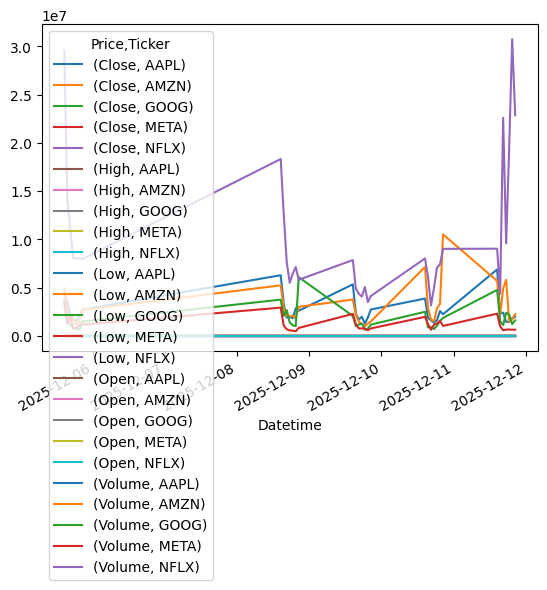

In [10]:
# Just call plot() with no arguments and see what happens
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df.plot()

In [11]:
# show the columns of the dataframe
df.columns 

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [12]:
# Show the closing price for Apple
df[('Close', 'AAPL')]

Datetime
2025-12-05 14:30:00+00:00    280.455109
2025-12-05 15:30:00+00:00    279.295013
2025-12-05 16:30:00+00:00    278.315002
2025-12-05 17:30:00+00:00    279.440002
2025-12-05 18:30:00+00:00    279.233795
2025-12-05 19:30:00+00:00    278.801392
2025-12-05 20:30:00+00:00    278.790009
2025-12-08 14:30:00+00:00    277.559998
2025-12-08 15:30:00+00:00    277.459991
2025-12-08 16:30:00+00:00    277.230011
2025-12-08 17:30:00+00:00    276.970001
2025-12-08 18:30:00+00:00    276.359985
2025-12-08 19:30:00+00:00    276.924988
2025-12-08 20:30:00+00:00    277.959991
2025-12-09 14:30:00+00:00    277.700012
2025-12-09 15:30:00+00:00    277.410004
2025-12-09 16:30:00+00:00    277.875000
2025-12-09 17:30:00+00:00    278.385010
2025-12-09 18:30:00+00:00    278.690002
2025-12-09 19:30:00+00:00    277.864990
2025-12-09 20:30:00+00:00    277.230011
2025-12-10 14:30:00+00:00    277.450012
2025-12-10 15:30:00+00:00    278.257690
2025-12-10 16:30:00+00:00    278.526489
2025-12-10 17:30:00+00:00    27

<Axes: xlabel='Datetime'>

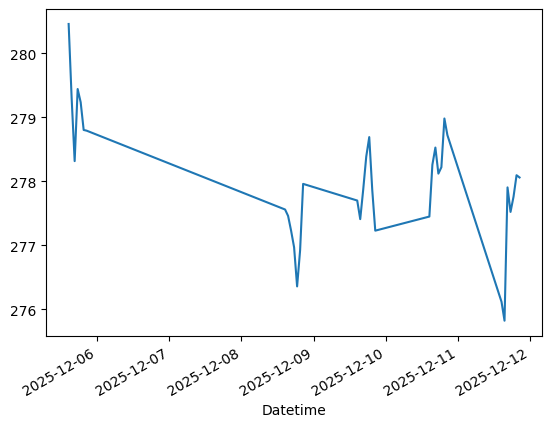

In [13]:
# Plotting the closing price for Apple for testing purposes
df[('Close', 'AAPL')].plot()

<Axes: xlabel='Datetime'>

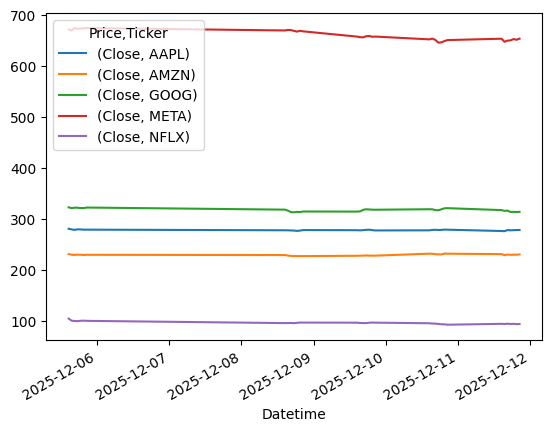

In [14]:
# Closing price for all FAANG stocks
df[[('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOG'), ('Close', 'META'), ('Close', 'NFLX')]].plot()

In [15]:
# Simplify accessing the 'Close' prices without hard-coding the stock names
df['Close']
print(df['Close'].head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   

Ticker                           NFLX  
Datetime                               
2025-12-05 14:30:00+00:00  104.665001  
2025-12-05 15:30:00+00:00  100.519997  
2025-12-05 16:30:00+00:00   99.949997  


<Axes: xlabel='Datetime'>

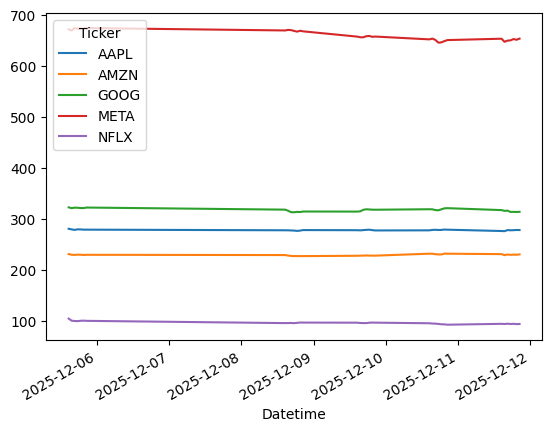

In [16]:
# Plotting the closing prices for all stocks
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df['Close'].plot()

### - Finding the Latest CSV File  

To work with the most recent dataset, we retrieve all filenames from the `data` folder using Python’s `os.listdir` function. Since each CSV file is saved with a timestamp in its filename, we simply sort the list in reverse order and select the first entry. This gives the newest file without needing to check creation times.

In [17]:
# List and sort files
files = os.listdir("data/")

# Sort files in reverse order (newest first)
files.sort(reverse=True)

In [18]:
# Latest file (newest timestamp)
latest = files[0]

# Get the full path of the latest file
full_path = os.path.join("data", latest)

# Checking the latest file path
print(f"Using latest file: {full_path}")

Using latest file: data/20251211-212235.csv


### - Read the most recent CSV file into a DataFrame

In [ ]:
# header=[0, 1] handles multi-level columns; index_col=0 sets the first column as the index.
# parse_dates=True converts the index to datetime format.
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv(full_path, header=[0, 1], index_col=0, parse_dates=True)
df.index # Display the index to verify datetime conversion

DatetimeIndex(['2025-12-05 14:30:00+00:00', '2025-12-05 15:30:00+00:00',
               '2025-12-05 16:30:00+00:00', '2025-12-05 17:30:00+00:00',
               '2025-12-05 18:30:00+00:00', '2025-12-05 19:30:00+00:00',
               '2025-12-05 20:30:00+00:00', '2025-12-08 14:30:00+00:00',
               '2025-12-08 15:30:00+00:00', '2025-12-08 16:30:00+00:00',
               '2025-12-08 17:30:00+00:00', '2025-12-08 18:30:00+00:00',
               '2025-12-08 19:30:00+00:00', '2025-12-08 20:30:00+00:00',
               '2025-12-09 14:30:00+00:00', '2025-12-09 15:30:00+00:00',
               '2025-12-09 16:30:00+00:00', '2025-12-09 17:30:00+00:00',
               '2025-12-09 18:30:00+00:00', '2025-12-09 19:30:00+00:00',
               '2025-12-09 20:30:00+00:00', '2025-12-10 14:30:00+00:00',
               '2025-12-10 15:30:00+00:00', '2025-12-10 16:30:00+00:00',
               '2025-12-10 17:30:00+00:00', '2025-12-10 18:30:00+00:00',
               '2025-12-10 19:30:00+00:00', '2025-1

In [21]:
# Select only the 'Close' prices
close_df = df['Close']
print(close_df.head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-12-05 14:30:00+00:00  280.455109  230.938400  322.464996  670.984985   
2025-12-05 15:30:00+00:00  279.295013  229.673996  320.878998  668.650024   
2025-12-05 16:30:00+00:00  278.315002  229.389999  321.850006  673.638000   

Ticker                           NFLX  
Datetime                               
2025-12-05 14:30:00+00:00  104.665001  
2025-12-05 15:30:00+00:00  100.519997  
2025-12-05 16:30:00+00:00   99.949997  


### - Saving Plots    



TBA

### - Complete Function: `plot_data()`    

Below is the final version of the `plot_data()` function that combines all the steps demonstrated earlier. This function opens the most recent CSV file from the `data` folder, plots the `Close` prices for the five FAANG stocks on a single chart with axis labels, a legend, and the current date as the title. The plot is then saved as a timestamped PNG file in the `plots` folder, and the folder is created automatically if it doesn’t already exist.

Using latest file: data/20251211-212235.csv


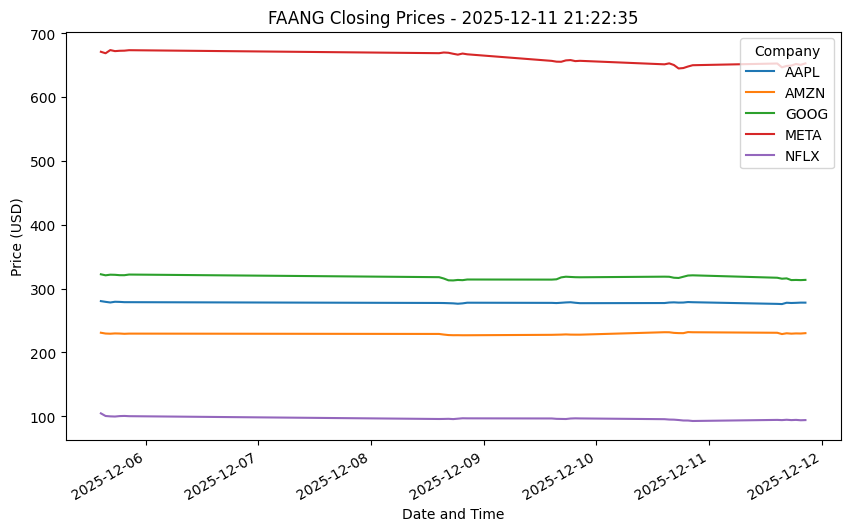

Plot saved as: plots/20251211-212237.png


In [ ]:
# Script of the `plot_data()` function
#
# References:
# https://matplotlib.org/stable/gallery/index.html
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://docs.python.org/3/library/os.html
# OpenAI

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os

def plot_data():
    """
    Opens the latest CSV file in the 'data' folder, plots the 
    closing prices of the FAANG companies, and saves the plot 
    with a timestamped filename in the 'plots' folder.
    """

    # List and sort files
    files = os.listdir("data/")
    files.sort(reverse=True) # Newest file first

    # Latest file (newest timestamp)
    latest = files[0] # Get the latest file
    full_path = os.path.join("data", latest) # Get full path

    print(f"Using latest file: {full_path}")

    # Read the CSV with multi-level columns
    df = pd.read_csv(full_path, header=[0, 1], index_col=0, parse_dates=True)

    # Select only Close prices
    close_df = df["Close"]

    # Title date based on filename
    # Reference: OpenAI
    base = latest.replace(".csv", "")
    title_date = dt.datetime.strptime(base, "%Y%m%d-%H%M%S").strftime("%Y-%m-%d %H:%M:%S")

    # Plot
    close_df.plot(figsize=(10, 6), title=f"FAANG Closing Prices - {title_date}")
    plt.xlabel("Date and Time")
    plt.ylabel("Price (USD)")
    plt.legend(title="Company")

    # Save plot
    plot_filename = f"plots/{dt.datetime.now().strftime('%Y%m%d-%H%M%S')}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Plot saved as: {plot_filename}")

# Example usage
plot_data()


---

## 🔹Problem 3: Script  

---

### - Requirements:  

Create a Python script called `faang.py` in the root of your repository.
Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.
Note that this will require a shebang line and the script to be marked executable.
Explain the steps you took in your notebook.

---

TBA

---

## 🔹Problem 4: Automation  

---

### - Requirements:  

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.
The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.
In your notebook, explain each of the individual lines in your workflow.

---

TBA

---

## End